**BDAT 1015**: Applied Machine Learning

**Student Name**: Babatunde Obalalu

**Student ID**:  200512782

**Assignment 1**: An MNIST Dataset Classical Model

In [1]:
# Import useful libraries and packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                             f1_score, confusion_matrix, classification_report)

In [2]:
# Open MNIST (mnist_784): This is the unique name assigned to the dataset for ease of use with open data
# Note: fetch_openml may returns data as strings; convert if needed
print("Loading MNIST dataset for normalization and classification:")

# Fetch dataset from openml by name or dataset id
mnist = fetch_openml('mnist_784', version=1)

# Convert string labels to floats
X = mnist.data.astype(np.float32)

# Convert string labels to integers
y = mnist.target.astype(np.int32)

Loading MNIST dataset for normalization and classification:


In [3]:
# Set the data's normalization to [0, 1]
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [4]:
# Preparing Dataset for classification

# Create training and testing sets of data (60,000 and 10,000 samples, respectively)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, train_size=60000, test_size=10000, stratify=y, random_state=42)

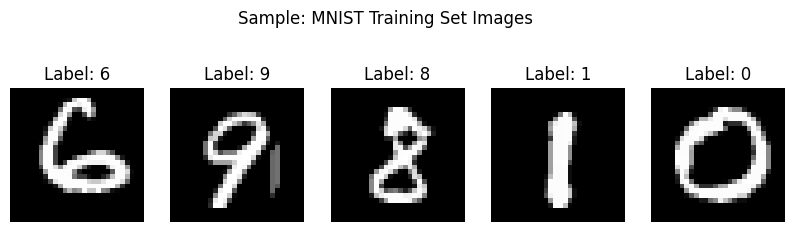

In [16]:
# Show a sample couple images from the training set
fig, axes = plt.subplots(1, 5, figsize=(10, 3))
for ax, img, label in zip(axes, X_train[:5], y_train[:5]):
    ax.imshow(img.reshape(28, 28), cmap='gray')
    ax.set_title(f"Label: {label}")
    ax.axis('off')
plt.suptitle("Sample: MNIST Training Set Images")
plt.show()

In [6]:
# SVM Example: Model Training with a Classical ML Method

# Define a parameter grid for tuning the SVM (RBF kernel)
param_grid = {
    'C': [1, 10],
    'gamma': [0.001, 0.0001]
}

svm = SVC(kernel='rbf', decision_function_shape='ovo')
grid_search = GridSearchCV(svm, param_grid, cv=3, n_jobs=-1, scoring='f1_weighted')
grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_
print("Ideal SVM Parameters:", grid_search.best_params_)

Ideal SVM Parameters: {'C': 10, 'gamma': 0.001}


In [7]:
# Generating predictions for training and testing sets
y_train_pred = best_model.predict(X_train)
y_test_pred = best_model.predict(X_test)

In [8]:
# Compute evaluation metrics for training and testing data

# Training data
train_accuracy  = accuracy_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred, average='weighted')
train_recall    = recall_score(y_train, y_train_pred, average='weighted')
train_f1        = f1_score(y_train, y_train_pred, average='weighted')

# Testing data
test_accuracy  = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred, average='weighted')
test_recall    = recall_score(y_test, y_test_pred, average='weighted')
test_f1        = f1_score(y_test, y_test_pred, average='weighted')

In [17]:
# Make a pandas dataframe so that the summary may be shown in tabular form.
evaluation_summary = pd.DataFrame({
    'Dataset': ['Training', 'Testing'],
    'Accuracy': [train_accuracy, test_accuracy],
    'Precision': [train_precision, test_precision],
    'Recall': [train_recall, test_recall],
    'F1 Score': [train_f1, test_f1]
})

print("\nOverview of Evaluation Metrics:")
print(evaluation_summary)


Overview of Evaluation Metrics:
    Dataset  Accuracy  Precision  Recall  F1 Score
0  Training    0.9648   0.964774  0.9648  0.964761
1   Testing    0.9566   0.956508  0.9566  0.956515


In [18]:
# Print detailed classification report for training set
print("\nClassification Report: Training Set")
print(classification_report(y_train, y_train_pred))

# Print detailed classification report fr testing set
print("\nClassification Report: Testing Set")
print(classification_report(y_test, y_test_pred))


Classification Report: Training Set
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      5917
           1       0.98      0.99      0.98      6752
           2       0.96      0.96      0.96      5991
           3       0.96      0.95      0.95      6121
           4       0.96      0.97      0.96      5849
           5       0.95      0.95      0.95      5411
           6       0.98      0.98      0.98      5894
           7       0.97      0.96      0.97      6251
           8       0.97      0.95      0.96      5850
           9       0.96      0.95      0.95      5964

    accuracy                           0.96     60000
   macro avg       0.96      0.96      0.96     60000
weighted avg       0.96      0.96      0.96     60000


Classification Report: Testing Set
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       986
           1       0.97      0.99      0.98      1125
     

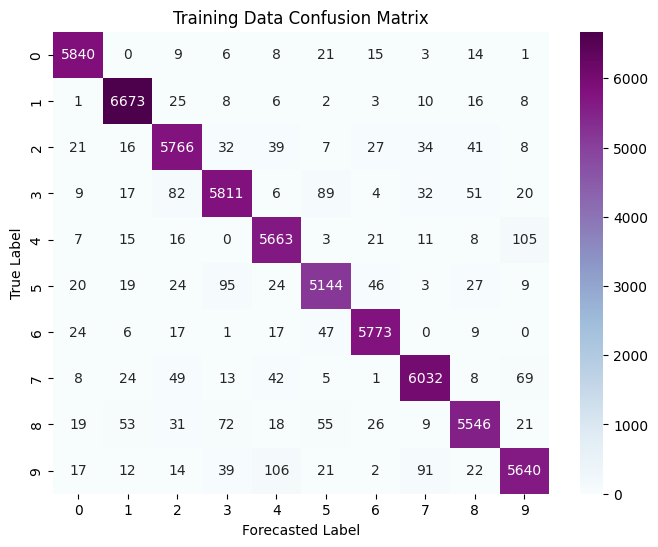

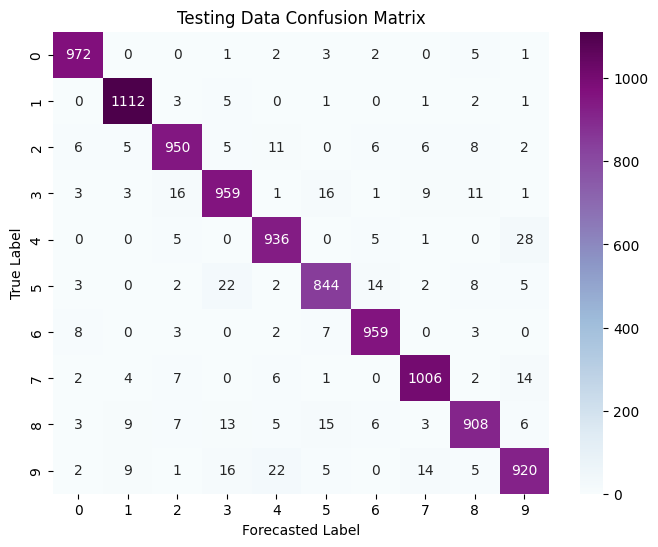

In [15]:
# Graphical Summary: Plotting Confusion Matrices
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="BuPu",
                xticklabels=[str(i) for i in range(10)],
                yticklabels=[str(i) for i in range(10)])
    plt.title(title)
    plt.xlabel("Forecasted Label")
    plt.ylabel("True Label")
    plt.show()

# Plot confusion matrix for training data
plot_confusion_matrix(y_train, y_train_pred, "Training Data Confusion Matrix")

# Plot confusion matrix for testing data
plot_confusion_matrix(y_test, y_test_pred, "Testing Data Confusion Matrix")